<a href="https://colab.research.google.com/github/Vidarr22/BML-LCA-2-3-./blob/main/Exp_9_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 9: Build the K-means clustering model on market segmentation dataset.

Dataset Used: Bank Marketing Dataset

Built_In

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Loading the Bank Marketing dataset

In [5]:
import pandas as pd
import zipfile
import urllib.request
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
urllib.request.urlretrieve(url, "bank-additional.zip")
with zipfile.ZipFile("bank-additional.zip", 'r') as z:
    z.extractall("bank_data")
df = pd.read_csv("bank_data/bank-additional/bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


EDA

In [6]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nDescription:\n", df.describe(include='all'))

Shape: (41188, 21)

Columns:
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Description:
                 age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     

Checking for Null Values

In [7]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


Target Variable Distribution

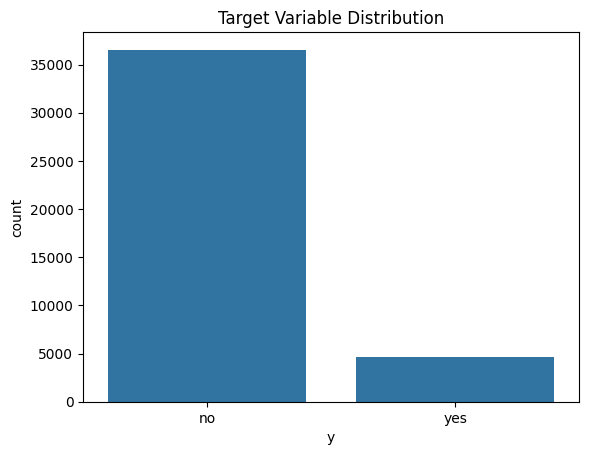

In [8]:
sns.countplot(data=df, x='y')
plt.title("Target Variable Distribution")
plt.show()

Converting Categorical to Numerical Values

In [9]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False


Manual Implementation

K-Means Accuracy: 88.73%


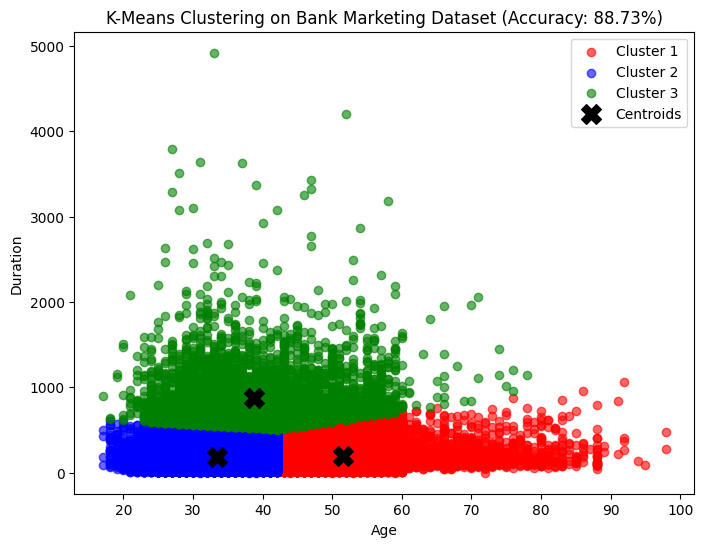

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv("bank_data/bank-additional/bank-additional-full.csv", sep=';')

# Use numeric columns available in dataset
X = df[['age', 'duration']].values

# Encode target
y = LabelEncoder().fit_transform(df['y'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
model = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = model.fit_predict(X_scaled)

# label mapping
cluster_to_label = {}
for cluster_id in range(3):
    labels_in_cluster = y[clusters == cluster_id]
    if len(labels_in_cluster) == 0:
        majority_label = -1
    else:
        majority_label = np.bincount(labels_in_cluster).argmax()
    cluster_to_label[cluster_id] = majority_label

predicted_labels = np.array([cluster_to_label[c] for c in clusters])

# Accuracy
accuracy = accuracy_score(y, predicted_labels)
print(f"K-Means Accuracy: {accuracy * 100:.2f}%")

# Plot
X_plot = scaler.inverse_transform(X_scaled)
colors = ['red', 'blue', 'green']

plt.figure(figsize=(8, 6))
for cluster_id in range(3):
    plt.scatter(
        X_plot[clusters == cluster_id, 0],
        X_plot[clusters == cluster_id, 1],
        c=colors[cluster_id],
        label=f"Cluster {cluster_id+1}",
        alpha=0.6
    )

# Centroids
plt.scatter(
    scaler.inverse_transform(model.cluster_centers_)[:, 0],
    scaler.inverse_transform(model.cluster_centers_)[:, 1],
    marker='X', c='black', s=200, label='Centroids'
)

plt.xlabel("Age")
plt.ylabel("Duration")
plt.title(f"K-Means Clustering on Bank Marketing Dataset (Accuracy: {accuracy * 100:.2f}%)")
plt.legend()
plt.show()